# Logistic Regression

## Import libraries

In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from src.features.functions import import_data,find_best_threshold, optimize_threshold_for_accuracy, predict_classification
from src.features.plots import plot_confusion_matrix,plot_roc_curve_and_accuracy


## Import data

In [2]:
X_train, y_train, X_test, y_test = import_data()

## Validation data

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\User\.conda\envs\cuda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\.conda\envs\cuda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
y_prob_val = model.predict_proba(X_val)[:, 1]

In [6]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob_val)
auc = roc_auc_score(y_val, y_prob_val)

In [7]:
best_threshold, threshold_accuracy = find_best_threshold(fpr, tpr, thresholds, y_val, y_prob_val)

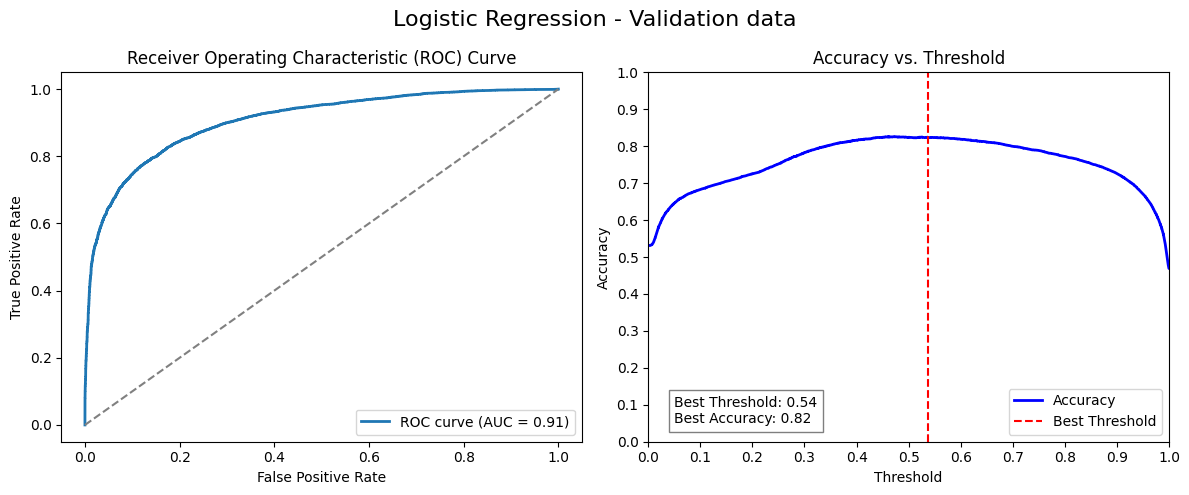

In [8]:
plot_roc_curve_and_accuracy(fpr, tpr, auc, thresholds, y_val, y_prob_val, "Logistic Regression - Validation data")

In [9]:
optimal_threshold, optimal_accuracy = optimize_threshold_for_accuracy(y_val, y_prob_val)
print(f"Optimal Threshold: {optimal_threshold:.3}, Accuracy: {optimal_accuracy:.3}")

Optimal Threshold: 0.475, Accuracy: 0.826


In [10]:
y_pred = predict_classification(model,X_test,y_test,optimal_threshold,True)

Evaluation metrics:
Accuracy    :	0.831
F1 score    :	0.841
Precision   :	0.851
NVP         :	0.831
Sensitivity :	0.831
Specificity :	0.831


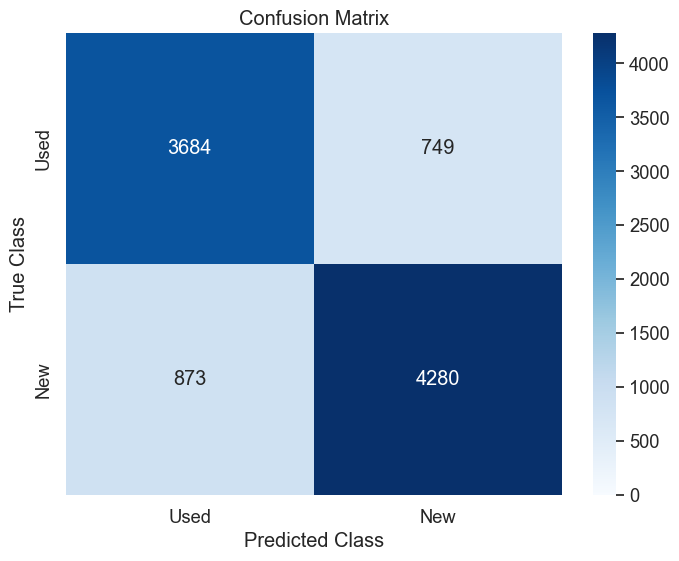

In [11]:
plot_confusion_matrix(y_test, y_pred,False,["Used","New"])

In [12]:
weights = pd.Series(model.coef_[0], index=X_train.columns.values)
df_weights = pd.DataFrame({'value': weights.abs()})
df_weights['is_positive'] = weights >= 0
df_weights = df_weights.sort_values(by='value', ascending=False)
df_weights = df_weights.reindex(columns=['is_positive', 'value'])

df_weights

,is_positive,value
listing_free,False,2.538441
mercadopago_payment,True,1.419561
free_shipping,True,1.266880
listing_silver,True,1.072464
automatic_relist,True,1.065719
available_quantity,True,0.868736
dragged_bids_or_visits,False,0.834830
num_pictures,False,0.722728
listing_bronze,True,0.668265
sold_quantity,True,0.650994
